# Init

In [1]:
from fastai.basics import *
from fastai.tabular.all import *

# Data

In [123]:
train_frames = pd.read_csv("data/titanic/train.csv")
test_frames = pd.read_csv("data/titanic/test.csv")

for df in [train_frames, test_frames]:
    # Extract Deck from Cabin field
    df["Deck"] = df["Cabin"].str[0]

    # Extract Title from Name
    df["Title"] = df["Name"].str.split(",").str[1].str.split(" ").str[1]

    df["Fare"].fillna(0, inplace=True)

train_frames.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,Mr.


In [73]:
splits = RandomSplitter(valid_pct=0.2)(range_of(data_frames))

tabs = TabularPandas(
    train_frames,
    procs=[Categorify, FillMissing, Normalize],
    cat_names=["Pclass", "Sex", "Embarked", "Deck", "Title"],
    cont_names=["SibSp", "Parch", "Age", "Fare"],
    y_names="Survived",
    y_block=CategoryBlock,
    splits=splits,
)

dls = tabs.dataloaders(bs=64)
dls.show_batch()

,Pclass,Sex,Embarked,Deck,Title,Age_na,SibSp,Parch,Age,Fare,Survived
0,3,female,S,G,Mrs.,False,5.387134e-10,2.000000e+00,24.000000,16.700001,1
1,3,male,S,#na#,Mr.,False,5.387134e-10,4.654481e-09,17.000000,8.662500,0
2,2,female,S,#na#,Miss.,False,5.387134e-10,4.654481e-09,50.000001,10.499999,1
3,1,female,C,B,Miss.,False,5.387134e-10,4.654481e-09,57.999999,146.520792,1
4,2,male,S,#na#,Mr.,False,5.387134e-10,4.654481e-09,34.000000,13.000000,0
5,1,male,C,C,Mr.,False,1.000000e+00,4.654481e-09,50.000001,106.425004,0
6,3,male,S,#na#,Mr.,False,5.387134e-10,4.654481e-09,22.000000,9.000001,0
7,3,male,S,#na#,Mr.,True,5.387134e-10,4.654481e-09,28.000000,7.895800,0
8,3,male,S,#na#,Mr.,False,5.387134e-10,4.654481e-09,34.000000,8.050000,0
9,2,male,S,#na#,Mr.,False,5.387134e-10,4.654481e-09,35.000000,10.499999,0


# Train

epoch,train_loss,valid_loss,accuracy,time
0,0.718795,0.682489,0.617977,00:00
1,0.680514,0.645892,0.741573,00:00
2,0.643487,0.587078,0.741573,00:00
3,0.621391,0.556051,0.814607,00:00
4,0.586549,0.450599,0.837079,00:00
5,0.553854,0.408562,0.853933,00:00
6,0.528248,0.372553,0.859551,00:00
7,0.506377,0.393356,0.837079,00:00
8,0.485864,0.381396,0.820225,00:00
9,0.467861,0.386948,0.853933,00:00


,Pclass,Sex,Embarked,Deck,Title,Age_na,SibSp,Parch,Age,Fare,Survived,Survived_pred
0,1.0,2.0,3.0,4.0,12.0,1.0,-0.480008,-0.464926,-0.043355,-0.057474,0.0,1.0
1,1.0,2.0,3.0,0.0,12.0,1.0,-0.480008,-0.464926,-0.121431,0.265717,0.0,0.0
2,1.0,2.0,1.0,3.0,12.0,2.0,-0.480008,-0.464926,-0.121431,-0.063144,1.0,0.0
3,3.0,1.0,3.0,0.0,13.0,1.0,0.492281,-0.464926,-0.277584,-0.320186,0.0,1.0
4,1.0,1.0,3.0,3.0,13.0,1.0,0.492281,-0.464926,0.425103,1.076531,1.0,1.0
5,3.0,2.0,3.0,0.0,12.0,2.0,-0.480008,-0.464926,-0.121431,-0.472332,0.0,0.0
6,2.0,2.0,1.0,0.0,12.0,1.0,-0.480008,-0.464926,-0.511813,-0.340110,0.0,0.0
7,1.0,1.0,3.0,2.0,13.0,1.0,0.492281,1.999702,0.503180,1.643534,1.0,1.0
8,2.0,1.0,3.0,0.0,9.0,1.0,-0.480008,-0.464926,0.347027,-0.378776,1.0,1.0


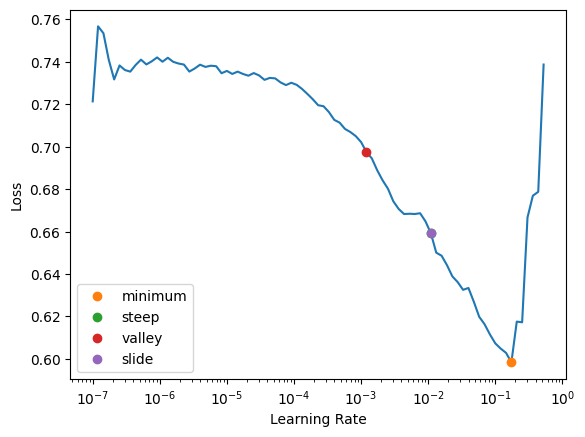

In [103]:
learn = tabular_learner(dls, metrics=accuracy)

learn.fit_one_cycle(20)

learn.show_results()

# Produce output

In [143]:
dl = learn.dls.test_dl(test_frames)
preds, *_ = learn.get_preds(dl=dl)

labels = np.argmax(preds, 1)

out_frames = pd.DataFrame({"PassengerId": test_frames["PassengerId"], "Survived": labels})
out_frames.to_csv("data/titanic/output.csv", index=False)